<a href="https://colab.research.google.com/github/salam2030/Compter_System_Engineering/blob/main/FYP_CODE_using_DLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [6]:
!pip install download

In [7]:
!pip install keras

In [8]:
!pip install pandas-ta

In [9]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [10]:
import yfinance as yf
from datetime import datetime

In [11]:
# Set the start and end dates
start = datetime(2014,1,1)
end = datetime.now().date().isoformat()
symbol = 'BTC-USD'


In [12]:
df = yf.download(symbol,start=start,end = end)
df.shape

[*********************100%***********************]  1 of 1 completed


(3699, 6)

In [ ]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [ ]:
df.shape

(3692, 9)

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (3694, 6)


In [13]:
new_var = print(df['Close'].isnull().sum())
new_var

Ticker
BTC-USD    0
dtype: int64


In [14]:
# Filter the dataframe to include only the Close price
data = df['Close']
dataset = data.values
np.shape(dataset)

(3699, 1)

In [15]:

# Define the percentage of the data to be used for training (80% in this case)
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2960

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit(dataset)
# Normalize each column manually
dataset_normalized = (dataset - dataset.min()) / (dataset.max() - dataset.min())
dataset_normalized


array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.98979553],
       [0.96065706],
       [0.95060679]])

In [17]:
# Create the training dataset
train_data = dataset[0:training_data_len, :]

# Create X_train and y_train datasets
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    if i <= 60:
        print(X_train)
        print(y_train)
        print()

X_train, y_train = np.array(X_train), np.array(y_train)

[array([457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
       398.8210144 , 402.15200806, 435.79098511, 423.20498657,
       411.57400513, 404.42498779, 399.51998901, 377.18099976,
       375.4670105 , 386.94400024, 383.61499023, 375.07199097,
       359.51199341, 328.86599731, 320.51000977, 330.07901001,
       336.18701172, 352.94000244, 365.02600098, 361.56201172,
       362.29901123, 378.54901123, 390.41400146, 400.86999512,
       394.77301025, 382.55599976, 383.75799561, 391.44198608,
       389.54598999, 382.84500122, 386.4750061 , 383.1579895 ,
       358.41699219, 358.34500122, 347.27099609, 354.70401001,
       352.98901367, 357.61801147, 335.59100342, 345.30499268,
       338.3210144 , 325.74899292, 325.89199829, 327.5539856 ,
       330.49200439, 339.48599243, 349.29000854, 342.41500854,
       345.48800659, 363.26400757, 366.92401123, 367.69500732,
       423.56100464, 420.73498535, 397.81799316, 376.13299561])]
[387.8819885253906]



In [ ]:
# Data Augmentation: Adding noise
#noise_factor = 0.01
#X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

In [ ]:
# Combine original and noisy data for training
#X_train_augmented = np.concatenate((X_train, X_train_noisy), axis=0)
#y_train_augmented = np.concatenate((y_train, y_train), axis=0)  # Duplicate labels for augmented data

In [ ]:
#X_train_augmented.shape


(5792, 60)

In [ ]:
#y_train_augmented.shape

(5792,)

In [ ]:
y_train.shape

(2896,)

In [ ]:
X_train.shape

(2896, 60)

In [ ]:
len(X_train)

2896

In [ ]:
len(y_train)

2896

In [18]:
 # Reshape the data for LSTM
X_train_augmente = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train_augmente.shape

(2900, 60, 1)

In [19]:
test_data = dataset[training_data_len - 60:, :]
#Create the testing dataset
y_test = dataset[training_data_len:, :]
X_test = []

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

    if i <= 60:
        print(X_test)
        print(y_test)
        print()
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

[array([20260.01953125, 20041.73828125, 19616.81445312, 20297.99414062,
       19796.80859375, 20049.76367188, 20127.140625  , 19969.77148438,
       19832.08789062, 19986.71289062, 19812.37109375, 18837.66796875,
       19290.32421875, 19329.83398438, 21381.15234375, 21680.5390625 ,
       21769.25585938, 22370.44921875, 20296.70703125, 20241.08984375,
       19701.2109375 , 19772.58398438, 20127.57617188, 19419.50585938,
       19544.12890625, 18890.7890625 , 18547.40039062, 19413.55078125,
       19297.63867188, 18937.01171875, 18802.09765625, 19222.671875  ,
       19110.546875  , 19426.72070312, 19573.05078125, 19431.7890625 ,
       19312.09570312, 19044.10742188, 19623.58007812, 20336.84375   ,
       20160.71679688, 19955.44335938, 19546.84960938, 19416.56835938,
       19446.42578125, 19141.484375  , 19051.41796875, 19157.4453125 ,
       19382.90429688, 19185.65625   , 19067.63476562, 19268.09375   ,
       19550.7578125 , 19334.41601562, 19139.53515625, 19053.74023438,
     

(739, 60, 1)

In [20]:
# Build the Deep LSTM model
tf.random.set_seed(42)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_augmente.shape[1], 1)))
model.add(Dropout(0.1))  # Adding a Dropout layer to prevent overfitting
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model with augmented data
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train, y_train, batch_size=1, epochs=10, callbacks=[callback])


Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 142s 46ms/step - loss: 431657664.0000
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 144s 47ms/step - loss: 312479744.0000
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 138s 45ms/step - loss: 283106112.0000
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - loss: 279965376.0000
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 132s 45ms/step - loss: 281423936.0000
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 146s 47ms/step - loss: 280291904.0000
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 138s 46ms/step - loss: 279439200.0000
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 132s 46ms/step - loss: 280011200.0000
Epoch 9/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - loss: 279620672.0000
Epoch 10/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 141s 45ms/step - loss: 279488128.0000


In [23]:
# Get the model predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
len(predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


739

In [24]:
# Calculate RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 259768629.4773871


Text(0.5, 0, 'epochs')

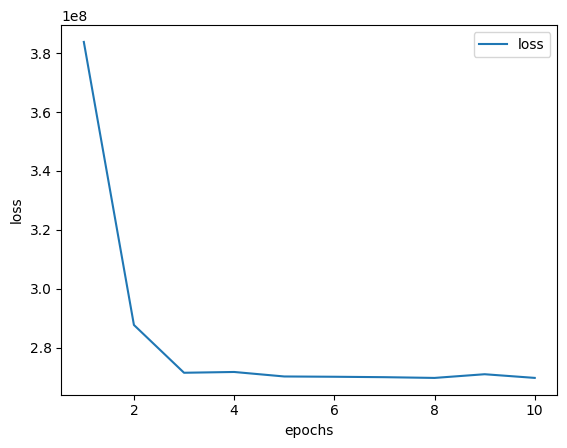

In [25]:
# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [26]:
# Plot the data
train = data[:training_data_len]


In [27]:
# Create the valid dataset
valid_1 = data[training_data_len:].copy()  # Make sure to create a copy of the slice
valid_1 = pd.DataFrame(valid_1)  # Ensure it's a DataFrame

In [28]:
train.shape

(2960, 1)

In [30]:
valid_1.shape

(739, 2)

In [29]:
# Add predictions to the valid set
valid_1['Predictions'] = predictions

KeyError: 'Close'

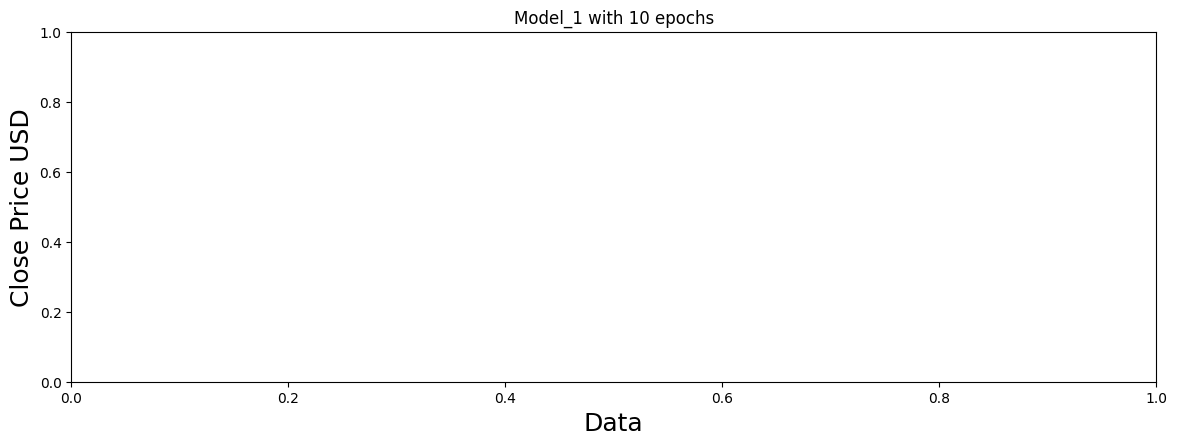

In [31]:
# Visualize the data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train.index, train['Close'], label='Train')
plt.plot(valid_1.index, valid_1['Close'], label='Valid')
plt.plot(valid_1.index, valid_1['Predictions'], label='Predictions')

plt.legend(loc='upper left')
plt.show()

KeyError: 'Close'

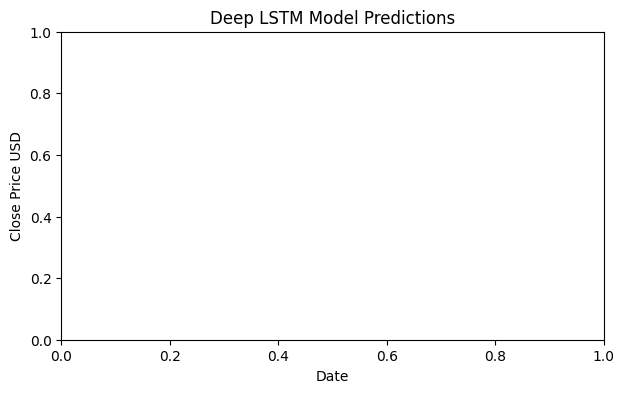

In [32]:
# Plotting
plt.figure(figsize=(7, 4))
plt.title('Deep LSTM Model Predictions')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price USD', fontsize=10)

# Use the correct column name
plt.plot(train.index, train['Close'], label='Train')
plt.plot(valid_1.index, valid_1['Close'], label='Valid')
plt.plot(valid_1.index, valid_1['Predictions'], label='Predictions')  # Uncomment this line to show predictions

plt.legend(loc='upper left')
plt.show()